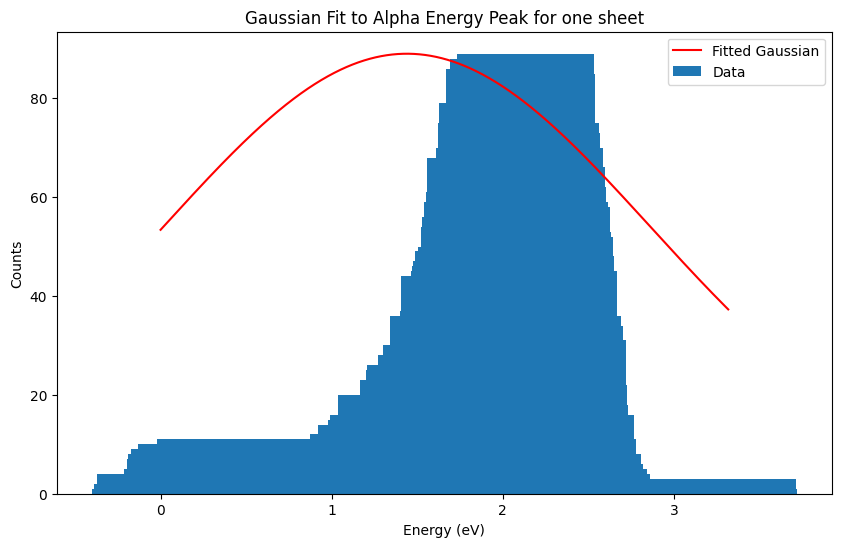

Fitted parameters for one sheet: A = 89.00380775454119, sigma = 1.4236546965591574, mu = 1.4394950450376247


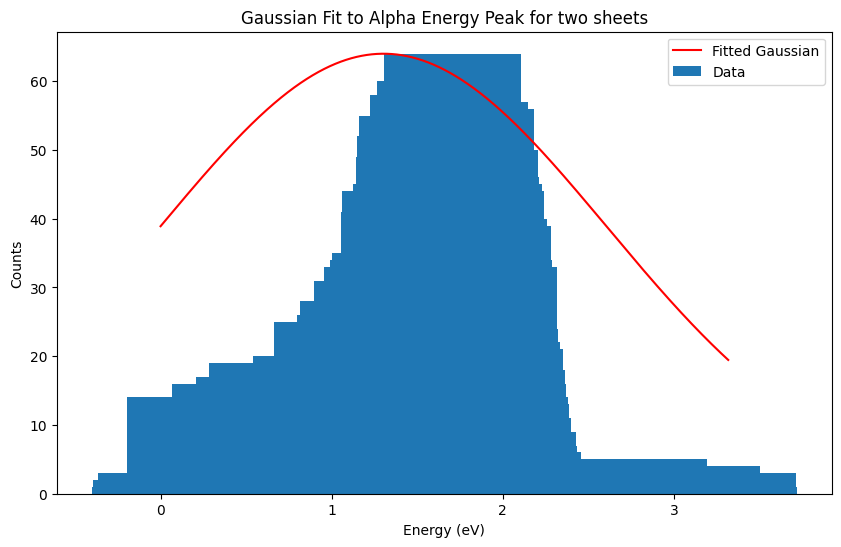

Fitted parameters for two sheets: A = 64.0027015732331, sigma = 1.305694273328014, mu = 1.3026638943401492


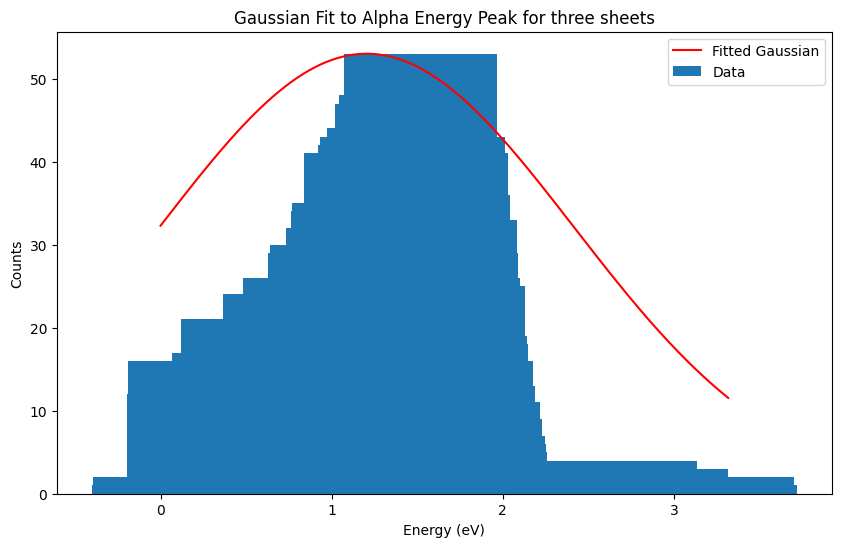

Fitted parameters for three sheets: A = 53.00139687362737, sigma = 1.2100140354231321, mu = 1.2045749769033771


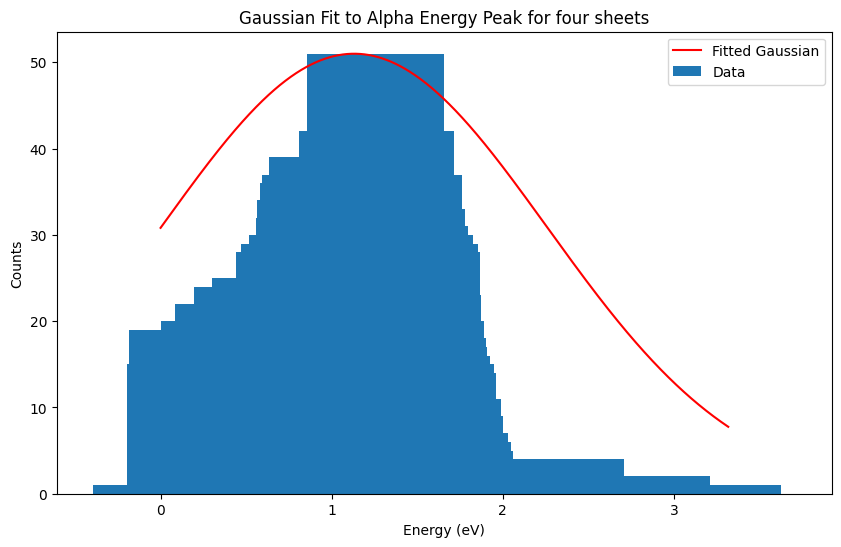

Fitted parameters for four sheets: A = 51.00072600294203, sigma = 1.126722062044735, mu = 1.130953000002811


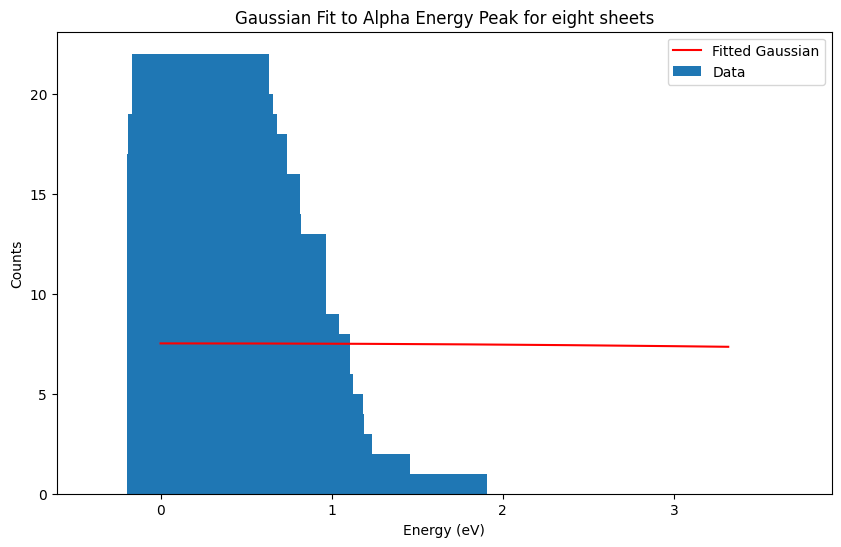

Fitted parameters for eight sheets: A = 7.516392161706691, sigma = 15.45811772495446, mu = 0.012174178758006967


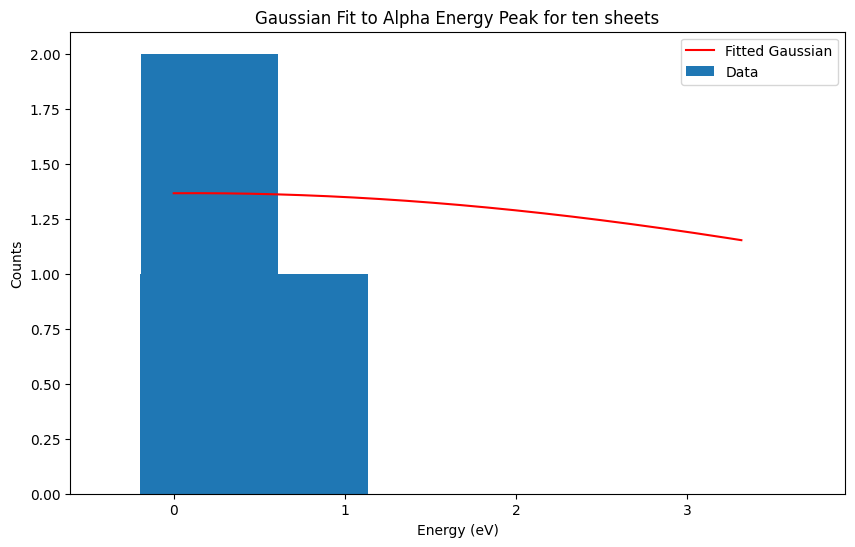

Fitted parameters for ten sheets: A = 1.366140041308541, sigma = 5.48928683886972, mu = 0.11622716184333426


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Read each CSV file into a pandas dataframe
one_sheet_df = pd.read_csv('./data/mylar3.csv', skiprows=6)     # 1 sheet
two_sheets_df = pd.read_csv('./data/mylar2.csv', skiprows=6)    # 2 sheets
three_sheets_df = pd.read_csv('./data/mylar1.csv', skiprows=6)  # 3 sheets
four_sheets_df = pd.read_csv('./data/mylar4.csv', skiprows=6)   # 4 sheets
eight_sheets_df = pd.read_csv('./data/mylar6.csv', skiprows=6)  # 8 sheets
ten_plus_sheets_df = pd.read_csv('./data/mylar5.csv', skiprows=6)  # 10+ sheets

# Given constants
channels = 16384
voltage = 1.15  # in Volts

# Calculate voltage per channel
voltage_per_channel = voltage / channels

# Conversion factors
G1 = 0.264  # C/J
G2 = 8.196 * 10**12  # V/C
v_to_j = (G1 * G2)**-1  # in J/V
j_to_ev = 6.242 * 10**12  # eV/J

# Function to convert channel number to energy in eV
def channel_to_ev(channel_number):
    voltage = channel_number * voltage_per_channel
    energy_joules = voltage * v_to_j
    energy_ev = energy_joules * j_to_ev
    return energy_ev

# Gaussian function
def gaussian(A, sigma, mu, x):
    return A * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Function to plot data and fit Gaussian
def df_plotter(df, name):
    channel_numbers = df['Channel'].values
    counts = df['Counts'].values

    # Convert channel numbers to energy in eV
    energies_ev = np.array([channel_to_ev(ch) for ch in channel_numbers])

    # Initial guesses for the parameters
    initial_guess = [max(counts), 1, energies_ev[np.argmax(counts)]]

    # Fit the Gaussian function to the data with bounds
    popt, pcov = curve_fit(gaussian, energies_ev, counts, p0=initial_guess, bounds=([0, 0, min(energies_ev)], [np.inf, np.inf, max(energies_ev)]))

    # Plot the data and the fitted Gaussian
    plt.figure(figsize=(10, 6))
    plt.bar(energies_ev, counts, label='Data')
    plt.plot(energies_ev, gaussian(popt[0], popt[1], popt[2], energies_ev), label='Fitted Gaussian', color='red')
    plt.xlabel('Energy (eV)')
    plt.ylabel('Counts')
    plt.title(f'Gaussian Fit to Alpha Energy Peak for {name}')
    plt.legend()
    plt.show()

    # Print the fitted parameters
    print(f"Fitted parameters for {name}: A = {popt[0]}, sigma = {popt[1]}, mu = {popt[2]}")

# Plot histograms and fit Gaussian for each dataframe
df_plotter(one_sheet_df, 'one sheet')
df_plotter(two_sheets_df, 'two sheets')
df_plotter(three_sheets_df, 'three sheets')
df_plotter(four_sheets_df, 'four sheets')
df_plotter(eight_sheets_df, 'eight sheets')
df_plotter(ten_plus_sheets_df, 'ten sheets')